In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
dataset=pd.read_csv('data/train_dataset.csv')


In [17]:
dataset.head()


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,...,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,...,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4


In [18]:
dataset.shape


(3004, 27)

In [19]:
# We will find the mean imdb score
mean_imdb_score = dataset['imdb_score_binned'].mean()
print(mean_imdb_score)


2.2503328894806924


/home/taherm/software/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


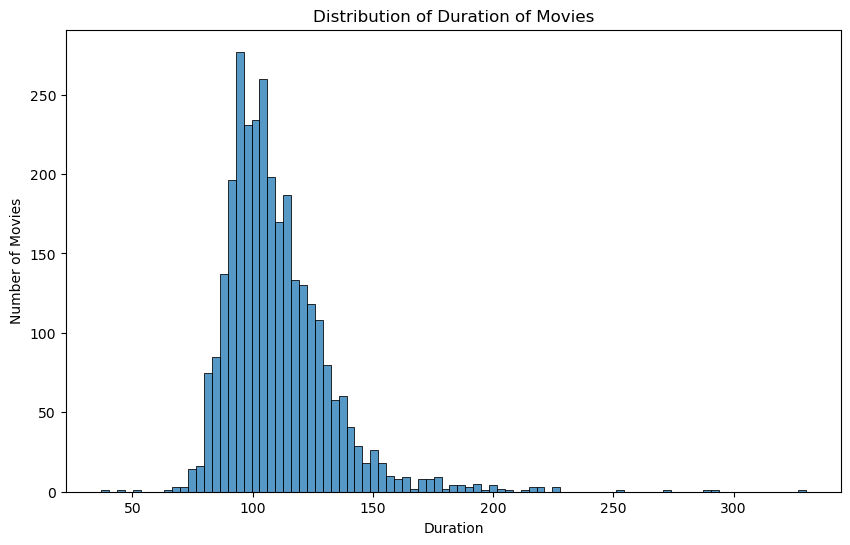

In [20]:
# Looking at the distribution of the duration of the movies
plt.figure(figsize=(10,6))
sns.histplot(dataset['duration'])
plt.title('Distribution of Duration of Movies')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.show()


In [21]:
# We will standardise some of the features. We will use z-score standardisation as it is better for zero mean models.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


/home/taherm/software/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


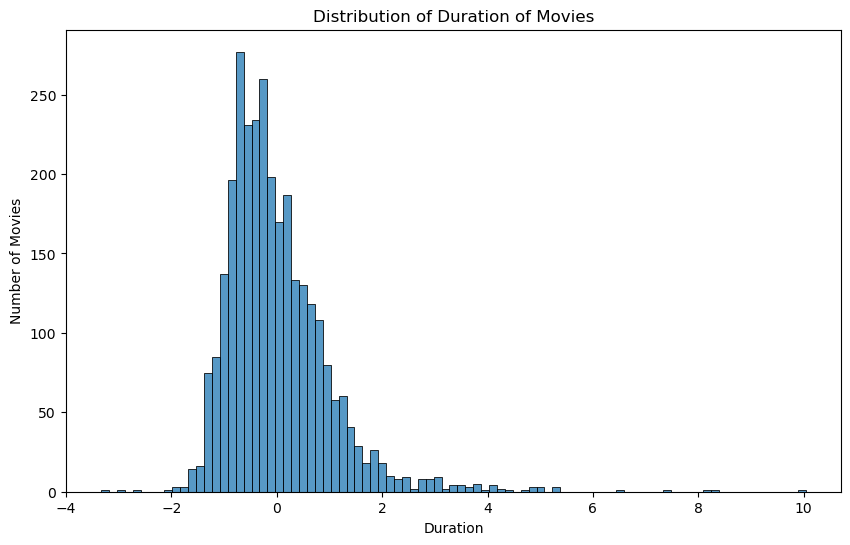

In [22]:
# We will standardise duration of movies
dataset['duration'] = scaler.fit_transform(dataset[['duration']])
# Looking at the distribution of the duration of the movies
plt.figure(figsize=(10,6))
sns.histplot(dataset['duration'])
plt.title('Distribution of Duration of Movies')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.show()


In [23]:
# We will standardise all the facebook likes, and number of users and critics.
dataset['director_facebook_likes'] = scaler.fit_transform(dataset[['director_facebook_likes']])
dataset['actor_1_facebook_likes'] = scaler.fit_transform(dataset[['actor_1_facebook_likes']])
dataset['actor_2_facebook_likes'] = scaler.fit_transform(dataset[['actor_2_facebook_likes']])
dataset['actor_3_facebook_likes'] = scaler.fit_transform(dataset[['actor_3_facebook_likes']])
dataset['cast_total_facebook_likes'] = scaler.fit_transform(dataset[['cast_total_facebook_likes']])
dataset['movie_facebook_likes'] = scaler.fit_transform(dataset[['movie_facebook_likes']])
dataset['num_critic_for_reviews'] = scaler.fit_transform(dataset[['num_critic_for_reviews']])
dataset['num_user_for_reviews'] = scaler.fit_transform(dataset[['num_user_for_reviews']])
dataset['num_voted_users'] = scaler.fit_transform(dataset[['num_voted_users']])
# We will also standardise the gross budget and face numbers
dataset['gross'] = scaler.fit_transform(dataset[['gross']])
dataset['facenumber_in_poster'] = scaler.fit_transform(dataset[['facenumber_in_poster']])


In [74]:
# We will do a correlation table between all the columns.
correlation = dataset.corr()
# We will plot the correlation table
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Table')
plt.show()


ValueError: could not convert string to float: 'G'

In [26]:
# Open doc2vec data
doc2vec_plot_data = np.load('data/features_doc2vec/train_doc2vec_features_plot_keywords.npy')
doc2vec_plot_data.shape


(3004, 100)

So this is for vectorizing plot, basically a better bagofwords.
If we want to use the movie's plot as a feature instead of using words we should use this.


In [27]:
# Making a single feature of the doc2vec


We are assuming that if we have a movie that has a higly related plot point to a film in training dataset then the movie will have a similar score.


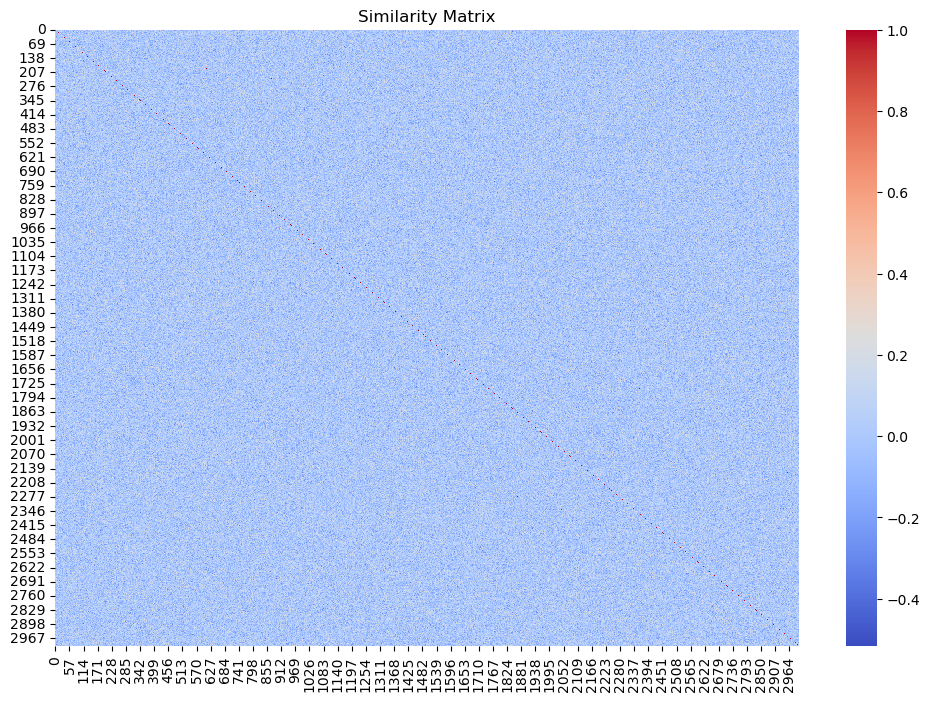

(3004, 3004)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

scaler = StandardScaler()
doc2vec_scaled = scaler.fit_transform(doc2vec_plot_data)
# Now we create a similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(doc2vec_scaled)

# Plotting the similarity matrix
plt.figure(figsize=(12,8))
sns.heatmap(similarity_matrix, cmap='coolwarm')
plt.title('Similarity Matrix')
plt.show()

similarity_matrix.shape


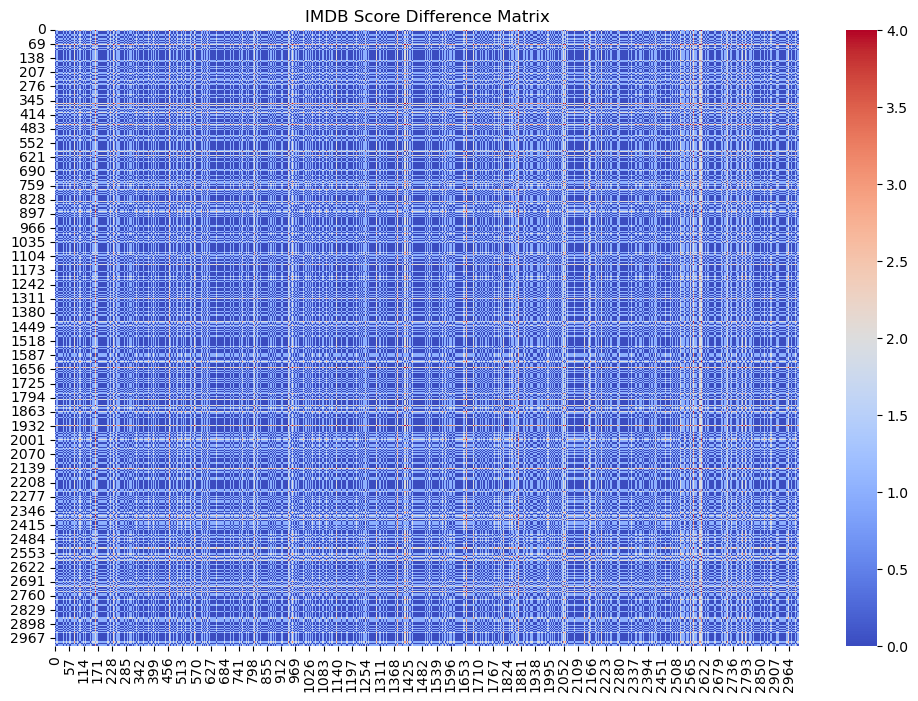

(3004, 3004)

In [29]:
# We will now create a matrix that is a matrix of difference of rating between movies
imdb_score_matrix = np.array(dataset['imdb_score_binned'])
imdb_score_matrix = imdb_score_matrix.reshape(-1,1)
imdb_score_matrix = np.repeat(imdb_score_matrix, len(imdb_score_matrix), axis=1)
imdb_score_matrix = np.abs(imdb_score_matrix - imdb_score_matrix.T)
plt.figure(figsize=(12,8))
sns.heatmap(imdb_score_matrix, cmap='coolwarm')
plt.title('IMDB Score Difference Matrix')
plt.show()
imdb_score_matrix.shape


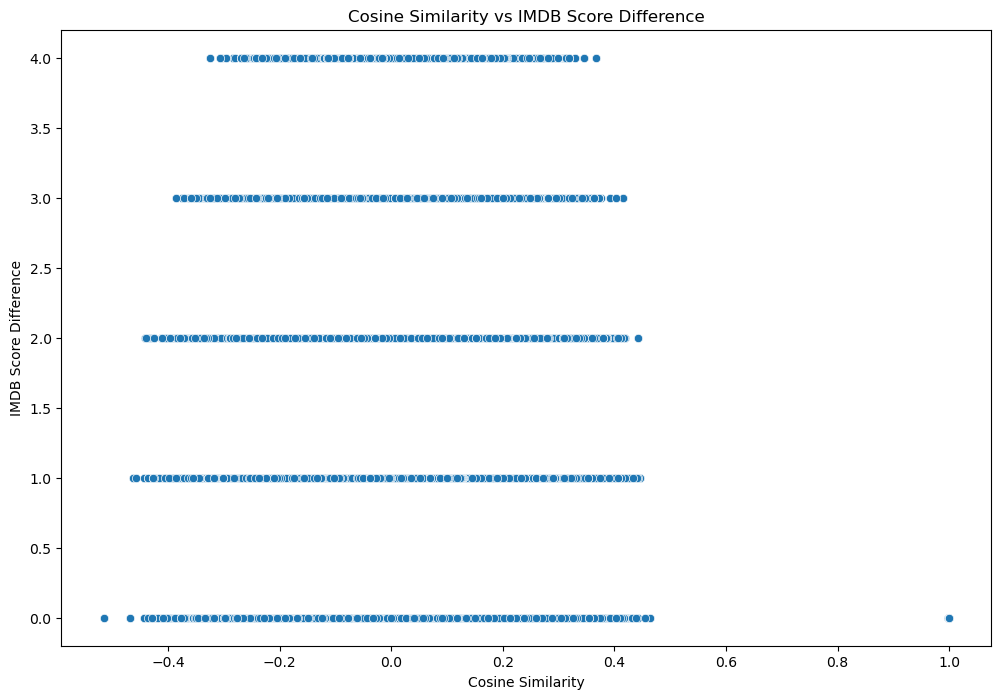

In [30]:
# Now we will scatter plot cosine similarity and imdb score difference
plt.figure(figsize=(12,8))
sns.scatterplot(x=similarity_matrix.flatten(), y=imdb_score_matrix.flatten())
plt.title('Cosine Similarity vs IMDB Score Difference')
plt.xlabel('Cosine Similarity')
plt.ylabel('IMDB Score Difference')
plt.show()


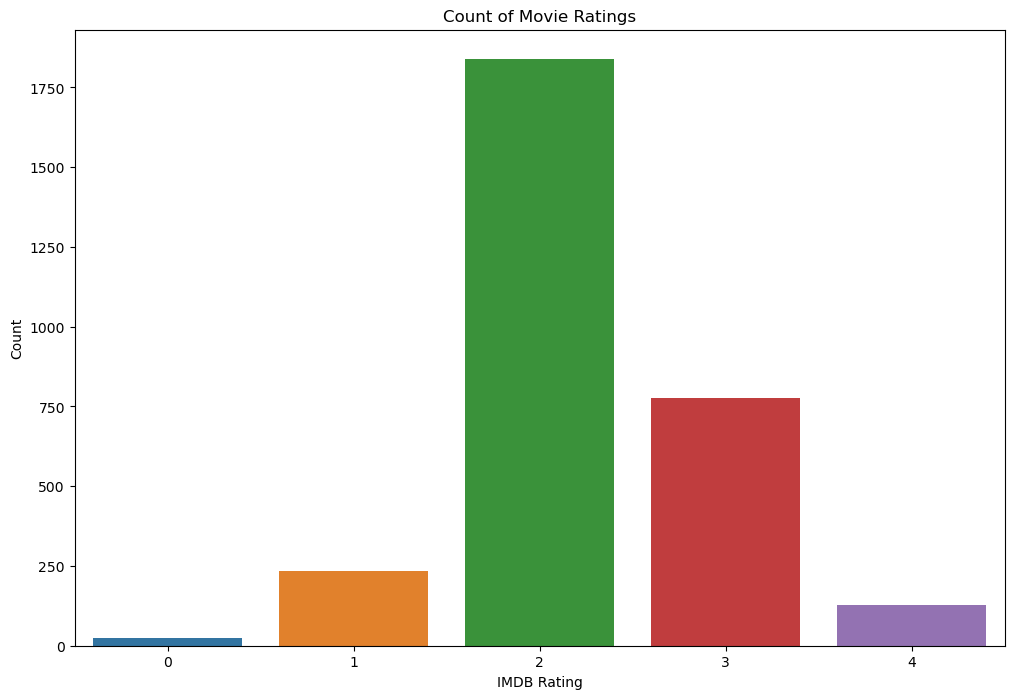

In [31]:
#Making a histogram of count of imdb score
plt.figure(figsize=(12,8))
sns.countplot(x='imdb_score_binned', data=dataset)
plt.title('Count of Movie Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Count')
plt.show()


In [32]:
# We have a genre column which has multiple genres separated by '|'. We will split these genres into separate columns.
# We will first find all the unique genres
unique_genres = set()
for genre in dataset['genres']:
    genre_list = genre.split('|')
    for g in genre_list:
        unique_genres.add(g)
unique_genres = list(unique_genres)
print(unique_genres)
# Now we split the genres into separate columns
for genre in unique_genres:
    dataset[genre] = dataset['genres'].str.contains(genre).astype(int)
dataset.drop(columns=['genres'], inplace=True)
dataset.head()


['Music', 'Musical', 'Sci-Fi', 'Mystery', 'Fantasy', 'History', 'Adventure', 'Film-Noir', 'Western', 'Crime', 'War', 'Documentary', 'Action', 'Romance', 'Horror', 'Drama', 'Thriller', 'Comedy', 'Family', 'Animation', 'Biography', 'Sport']


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,Action,Romance,Horror,Drama,Thriller,Comedy,Family,Animation,Biography,Sport
0,1,Roger Allers,0.168193,-1.692456,-0.251113,0.041616,Nathan Lane,-0.343014,5.423388,Matthew Broderick,...,0,0,0,1,0,0,1,1,0,0
1,2,George A. Romero,0.712593,-0.596914,-0.260477,-0.281257,Shawn Roberts,-0.424659,-0.459765,Tony Nappo,...,0,0,1,0,0,0,0,0,0,0
2,3,David Gordon Green,0.547624,0.316038,-0.182223,-0.287568,Tye Sheridan,0.263561,-0.753112,Nicolas Cage,...,0,0,0,1,0,0,0,0,0,0
3,4,John Carpenter,1.083775,-0.049143,-0.260477,-0.327532,Richard Masur,-0.406280,-0.557017,Wilford Brimley,...,0,0,1,0,0,0,0,0,0,0
4,5,Peter Jackson,1.083775,2.781008,-0.260477,0.046874,Orlando Bloom,0.506190,3.830379,Christopher Lee,...,1,0,0,1,0,0,0,0,0,0


In [33]:
# Since we saw that cast total facebook likes were correlated heavily with actor 1 facebook likes, we will drop actor 1 facebook likes
dataset.drop(columns=['actor_1_facebook_likes'], inplace=True)


In [34]:
dataset.head()


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,...,Action,Romance,Horror,Drama,Thriller,Comedy,Family,Animation,Biography,Sport
0,1,Roger Allers,0.168193,-1.692456,-0.251113,0.041616,Nathan Lane,5.423388,Matthew Broderick,The Lion King,...,0,0,0,1,0,0,1,1,0,0
1,2,George A. Romero,0.712593,-0.596914,-0.260477,-0.281257,Shawn Roberts,-0.459765,Tony Nappo,Land of the Dead,...,0,0,1,0,0,0,0,0,0,0
2,3,David Gordon Green,0.547624,0.316038,-0.182223,-0.287568,Tye Sheridan,-0.753112,Nicolas Cage,Joe,...,0,0,0,1,0,0,0,0,0,0
3,4,John Carpenter,1.083775,-0.049143,-0.260477,-0.327532,Richard Masur,-0.557017,Wilford Brimley,The Thing,...,0,0,1,0,0,0,0,0,0,0
4,5,Peter Jackson,1.083775,2.781008,-0.260477,0.046874,Orlando Bloom,3.830379,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,...,1,0,0,1,0,0,0,0,0,0


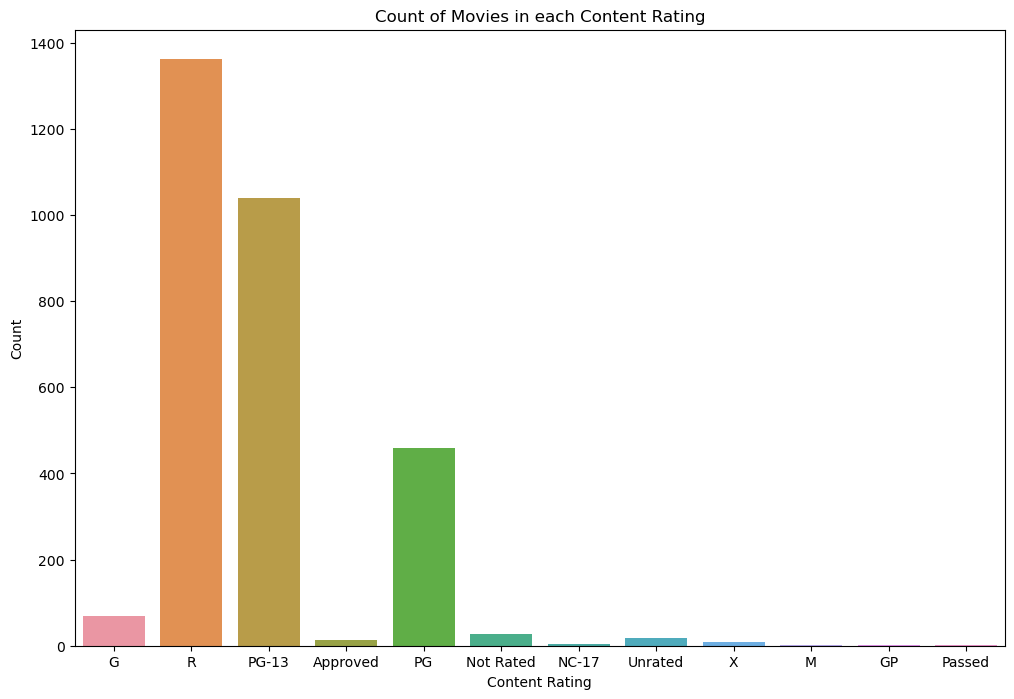

In [35]:
# We will count plot the number of movies in each content_rating
plt.figure(figsize=(12,8))
sns.countplot(x='content_rating', data=dataset)
plt.title('Count of Movies in each Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()


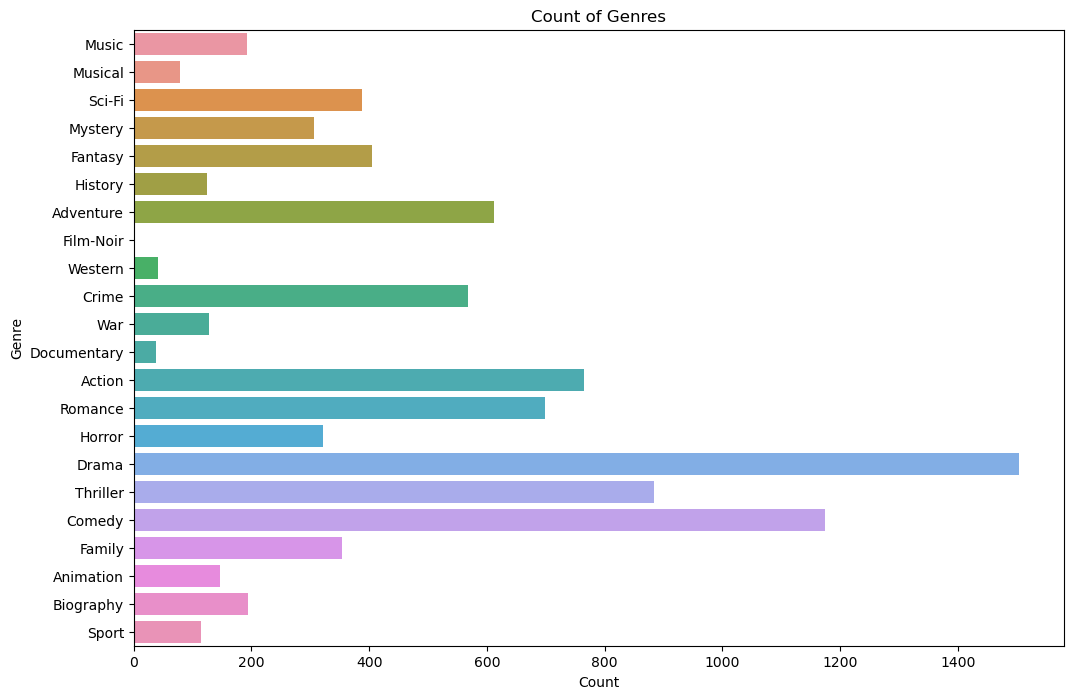

In [36]:
# We will plot the count of each genre
genre_count = dataset[unique_genres].sum()
plt.figure(figsize=(12,8))
sns.barplot(x=genre_count, y=genre_count.index)
plt.title('Count of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


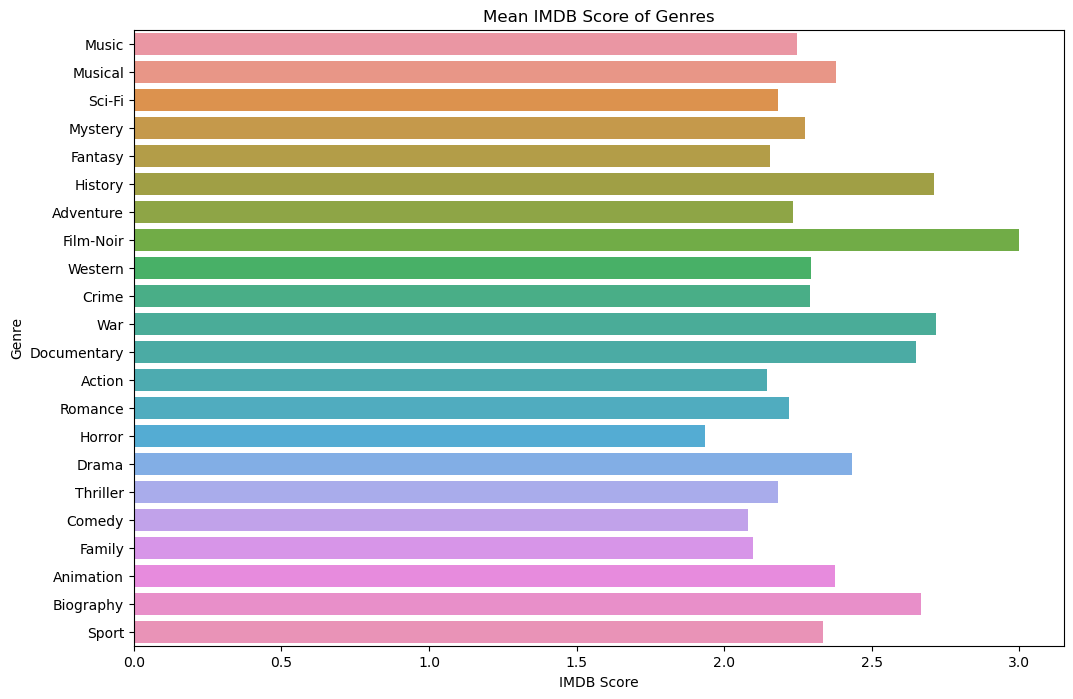

In [37]:
# We will plot the mean score of each genre
# First we calculate mean score of each genre
genre_mean_score = {}
for genre in unique_genres:
    genre_mean_score[genre] = dataset[dataset[genre] == 1]['imdb_score_binned'].mean()
genre_mean_score = pd.Series(genre_mean_score)
plt.figure(figsize=(12,8))
sns.barplot(x=genre_mean_score, y=genre_mean_score.index)
plt.title('Mean IMDB Score of Genres')
plt.xlabel('IMDB Score')
plt.ylabel('Genre')
plt.show()



We can see that Film-Noir has a very high mean score, this is because it is has a low count of movies and the movies are generally good. Thus, this is an outlier and means that we should not use this as a feature. 
For other genres we can see that the mean score is around 3.5 which is the mean of the dataset. This means that this doesnt give a straightforward correlation.


In [38]:
# We can see a correlation between number of user reviews and number of voted users
# So we drop number of user reviews
dataset.drop(columns=['num_user_for_reviews'], inplace=True)
pd.options.display.max_columns = None
dataset.head()


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned,Music,Musical,Sci-Fi,Mystery,Fantasy,History,Adventure,Film-Noir,Western,Crime,War,Documentary,Action,Romance,Horror,Drama,Thriller,Comedy,Family,Animation,Biography,Sport
0,1,Roger Allers,0.168193,-1.692456,-0.251113,0.041616,Nathan Lane,5.423388,Matthew Broderick,The Lion King,3.576467,-0.246173,Niketa Calame,-0.659713,king|prince|scar|uncle|unnecessary guilt,English,USA,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
1,2,George A. Romero,0.712593,-0.596914,-0.260477,-0.281257,Shawn Roberts,-0.459765,Tony Nappo,Land of the Dead,-0.172501,-0.474800,Pedro Miguel Arce,3.162426,apocalypse|mercenary|skyscraper|urban setting|...,English,Canada,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,David Gordon Green,0.547624,0.316038,-0.182223,-0.287568,Tye Sheridan,-0.753112,Nicolas Cage,Joe,-0.453535,0.110539,Ronnie Gene Blevins,0.295821,alcoholic|cigarette smoking|father son relatio...,English,USA,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,John Carpenter,1.083775,-0.049143,-0.260477,-0.327532,Richard Masur,-0.557017,Wilford Brimley,The Thing,1.015541,-0.480737,David Clennon,-0.659713,alien creature|alien life form|antarctica|isol...,English,USA,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Peter Jackson,1.083775,2.781008,-0.260477,0.046874,Orlando Bloom,3.830379,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,7.517258,0.546387,Billy Boyd,0.295821,elf|hobbit|middle earth|quest|ring,English,New Zealand,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


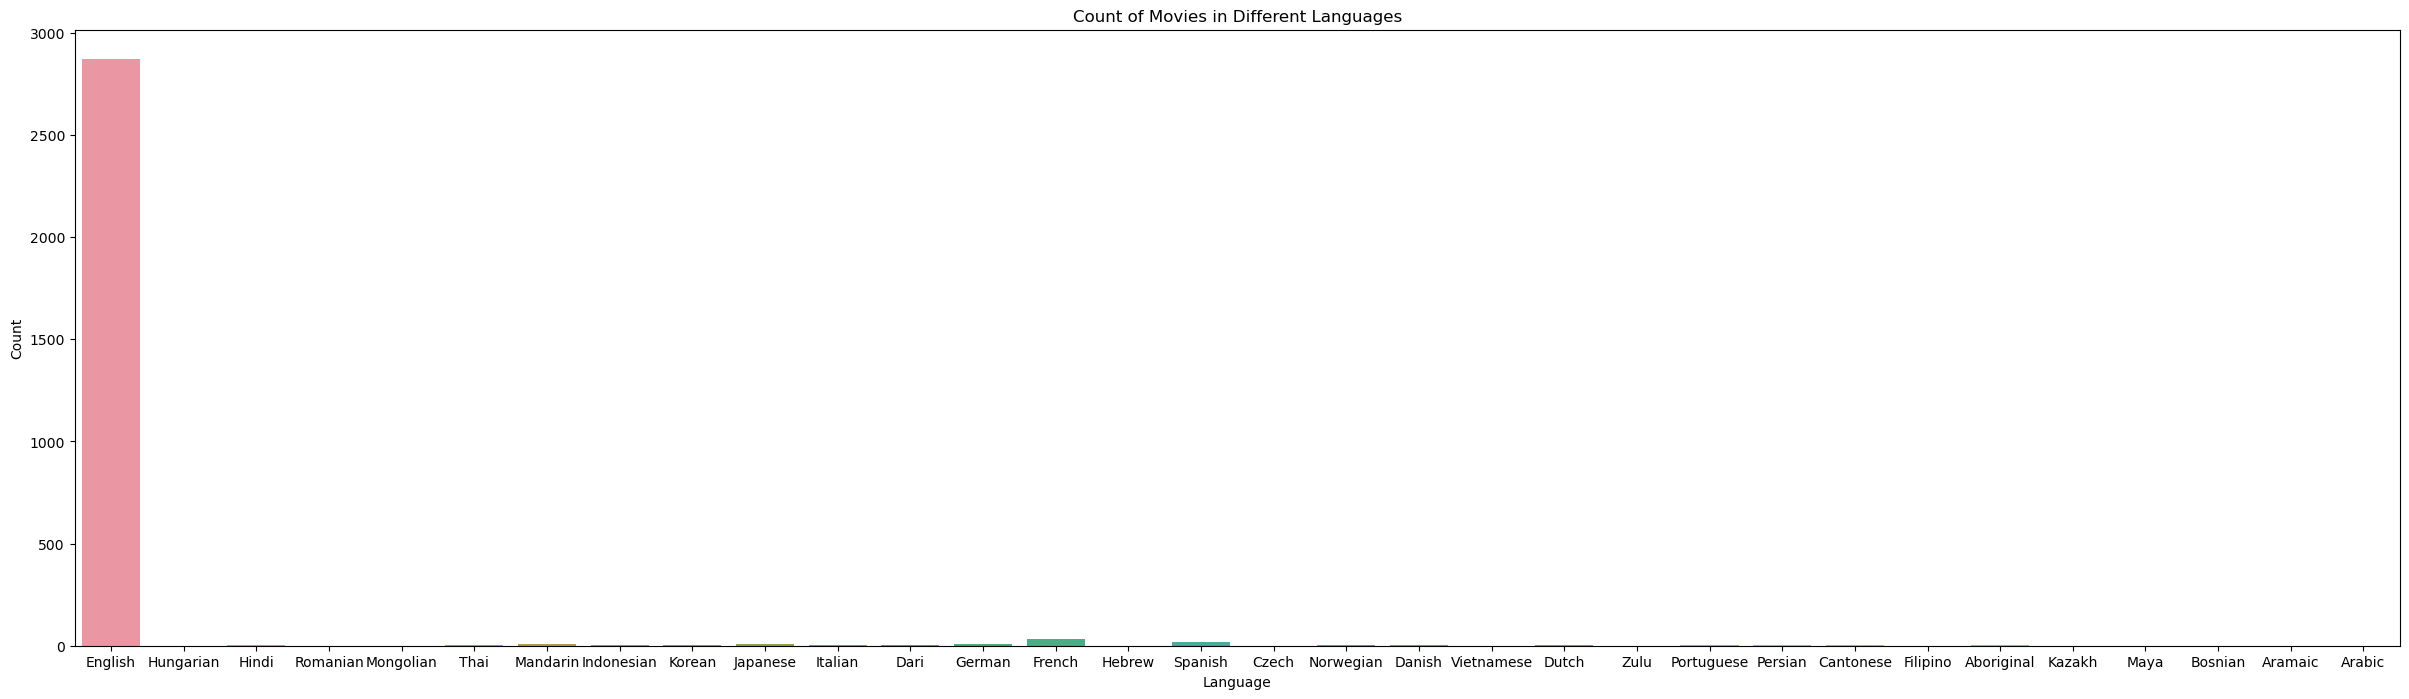

In [39]:
# We will plot language count.
plt.figure(figsize=(30,8))
sns.countplot(x='language', data=dataset)
plt.title('Count of Movies in Different Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


We can see that most films are in english and there are a lot of unique values, thus we drop the language feature.


In [40]:
# Dropping language column
dataset.drop(columns=['language'], inplace=True)


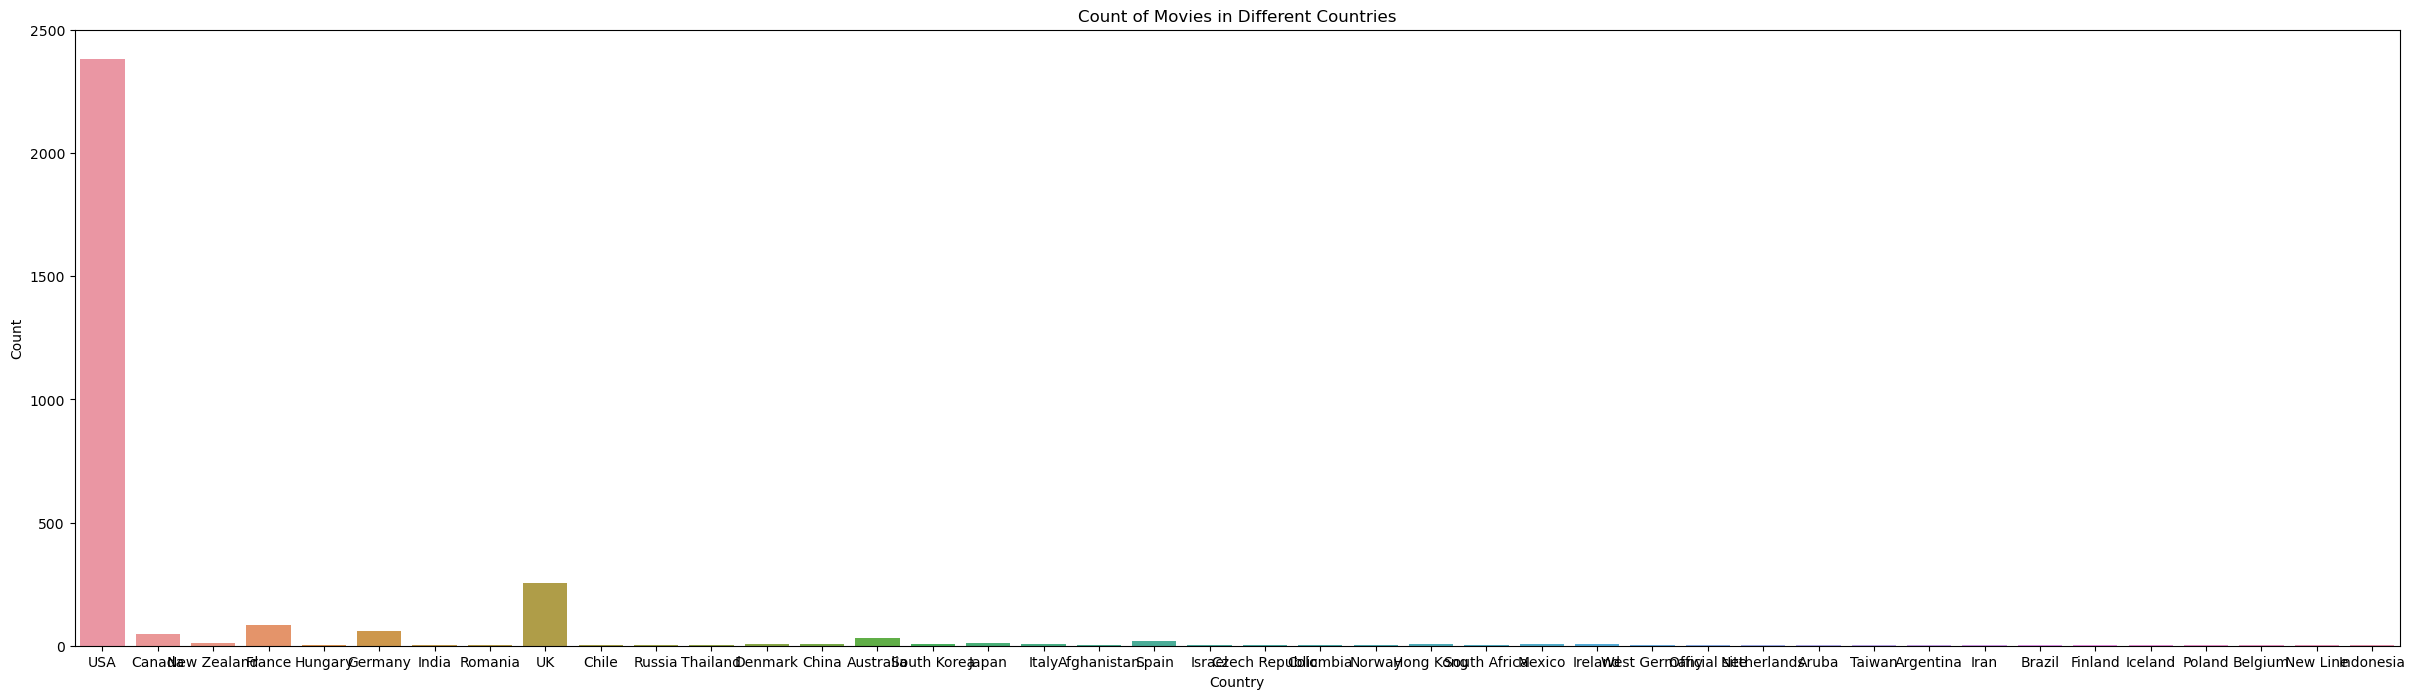

In [41]:
# We will plot country count.
plt.figure(figsize=(30,8))
sns.countplot(x='country', data=dataset)
plt.title('Count of Movies in Different Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


We can see that most films are made in USA and there are a lot of unique values, thus we drop the country feature.


In [42]:
# Dropping country column
dataset.drop(columns=['country'],inplace=True)


In [43]:
# We will drop the id, director name, actor names, movie title columns, and plot keywords.
dataset.drop(columns=['id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'plot_keywords'], inplace=True)


In [44]:
dataset.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned,Music,Musical,Sci-Fi,Mystery,Fantasy,History,Adventure,Film-Noir,Western,Crime,War,Documentary,Action,Romance,Horror,Drama,Thriller,Comedy,Family,Animation,Biography,Sport
0,0.168193,-1.692456,-0.251113,0.041616,5.423388,3.576467,-0.246173,-0.659713,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
1,0.712593,-0.596914,-0.260477,-0.281257,-0.459765,-0.172501,-0.474800,3.162426,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.547624,0.316038,-0.182223,-0.287568,-0.753112,-0.453535,0.110539,0.295821,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.083775,-0.049143,-0.260477,-0.327532,-0.557017,1.015541,-0.480737,-0.659713,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.083775,2.781008,-0.260477,0.046874,3.830379,7.517258,0.546387,0.295821,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [45]:
# We want to seperate the dataset into features and target
y = dataset['imdb_score_binned']
X = dataset.drop(columns=['imdb_score_binned'])
# We will also store the genres in a separate variable because we want to do stepwise selection for feature selection
genres = X[unique_genres]
X.drop(columns=unique_genres, inplace=True)
X.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality
0,0.168193,-1.692456,-0.251113,0.041616,5.423388,3.576467,-0.246173,-0.659713,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576
1,0.712593,-0.596914,-0.260477,-0.281257,-0.459765,-0.172501,-0.474800,3.162426,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675
2,0.547624,0.316038,-0.182223,-0.287568,-0.753112,-0.453535,0.110539,0.295821,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002
3,1.083775,-0.049143,-0.260477,-0.327532,-0.557017,1.015541,-0.480737,-0.659713,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726
4,1.083775,2.781008,-0.260477,0.046874,3.830379,7.517258,0.546387,0.295821,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876


In [46]:
# We will also drop the content_rating column as most movies are not rated R
X.drop(columns=['content_rating'], inplace=True)


In [47]:
# We will drop title_embedding
X.drop(columns=['title_embedding'], inplace=True)
X.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality
0,0.168193,-1.692456,-0.251113,0.041616,5.423388,3.576467,-0.246173,-0.659713,1994,-0.238016,0.404412,0.001576
1,0.712593,-0.596914,-0.260477,-0.281257,-0.459765,-0.172501,-0.474800,3.162426,2005,-0.314785,-0.451986,0.000675
2,0.547624,0.316038,-0.182223,-0.287568,-0.753112,-0.453535,0.110539,0.295821,2013,-0.213501,0.102154,0.003002
3,1.083775,-0.049143,-0.260477,-0.327532,-0.557017,1.015541,-0.480737,-0.659713,1982,-0.393489,0.706670,0.001726
4,1.083775,2.781008,-0.260477,0.046874,3.830379,7.517258,0.546387,0.295821,2001,0.646659,0.605918,0.001876


In [48]:
# We will drop the actor 3 facebook likes column
X.drop(columns=['actor_3_facebook_likes'], inplace=True)
X.head()


,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality
0,0.168193,-1.692456,-0.251113,5.423388,3.576467,-0.246173,-0.659713,1994,-0.238016,0.404412,0.001576
1,0.712593,-0.596914,-0.260477,-0.459765,-0.172501,-0.474800,3.162426,2005,-0.314785,-0.451986,0.000675
2,0.547624,0.316038,-0.182223,-0.753112,-0.453535,0.110539,0.295821,2013,-0.213501,0.102154,0.003002
3,1.083775,-0.049143,-0.260477,-0.557017,1.015541,-0.480737,-0.659713,1982,-0.393489,0.706670,0.001726
4,1.083775,2.781008,-0.260477,3.830379,7.517258,0.546387,0.295821,2001,0.646659,0.605918,0.001876


In [49]:
# We will also drop actor 2 facebook likes
X.drop(columns=['actor_2_facebook_likes'], inplace=True)


In [50]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Assuming X and y are defined elsewhere in your code:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM Model
svm = SVC()
param_grid = {
    'C': [1, 10],  # Regularization parameter
    'gamma': [0.01, 0.001],  # Kernel coefficient for RBF, polynomial and sigmoid
    'kernel': ['linear', 'rbf']  # Type of kernel
}
svm_gs = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose =10, refit=True)
svm_gs.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 3/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 3/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 1/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 2/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 2/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 1/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 2/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 3/3; 2/8] END ..C=1, gamma=0.01, kernel=rbf;, score=0.664 total time=   0.8s
[CV 1/3; 1/8] END C=1, gamma=0.01, kernel=linear;, score=0.707 total time=   0.8s
[CV 1/3; 5/8] START C=10, gamma=0.01, kernel=linear.............................
[CV 2/3; 5/8] START C=10, gamma=0.01, kernel=lin

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=10)

In [51]:
# SVM Model
svm = SVC()
param_grid = {
    'C': [1, 10],  # Regularization parameter
    'gamma': [0.01, 0.001],  # Kernel coefficient for RBF, polynomial and sigmoid
    'kernel': ['linear', 'rbf']  # Type of kernel
}
svm_gs = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose =10, refit=True)
svm_gs.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 2/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 3/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 1/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 2/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 3/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 1/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 2/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 3/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 1/3; 4/8] START C=1, gamma=0.001, kernel=rbf................................
[CV 2/3; 4/8] START C=1, gamma=0.001, kernel=rbf................................
[CV 3/3; 4/8] START C=1, gamma=0.001, kernel=rbf.

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=10)

In [52]:
svm_best = svm_gs.best_estimator_
# Printing parameters for the best estimator including kernel)
print(svm_gs.best_params_)
y_pred_svm = svm_best.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy}')


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Accuracy: 0.7004991680532446


In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Doing feature selection with the best SVM model
sffs = SFS(svm_best, 
           k_features='best', 
           forward=True, 
           floating=False, 
           cv=None)
sffs = sffs.fit(X, y)
sffs.subsets_


{1: {'feature_idx': (4,),
  'cv_scores': array([0.65146471]),
  'avg_score': 0.6514647137150466,
  'feature_names': ('num_voted_users',)},
 2: {'feature_idx': (3, 4),
  'cv_scores': array([0.67043941]),
  'avg_score': 0.670439414114514,
  'feature_names': ('gross', 'num_voted_users')},
 3: {'feature_idx': (3, 4, 7),
  'cv_scores': array([0.69573901]),
  'avg_score': 0.6957390146471372,
  'feature_names': ('gross', 'num_voted_users', 'title_year')},
 4: {'feature_idx': (1, 3, 4, 7),
  'cv_scores': array([0.70306258]),
  'avg_score': 0.7030625832223701,
  'feature_names': ('duration', 'gross', 'num_voted_users', 'title_year')},
 5: {'feature_idx': (1, 3, 4, 7, 8),
  'cv_scores': array([0.7087217]),
  'avg_score': 0.7087217043941412,
  'feature_names': ('duration',
   'gross',
   'num_voted_users',
   'title_year',
   'movie_facebook_likes')},
 6: {'feature_idx': (0, 1, 3, 4, 7, 8),
  'cv_scores': array([0.71438083]),
  'avg_score': 0.7143808255659121,
  'feature_names': ('num_critic_for_

In [61]:
# We will now get the subset with the highest cv_score and the lowest index as we are doing forward selection.
best_subset = sffs.subsets_[max(sffs.subsets_, key=lambda k: sffs.subsets_[k]['avg_score'])]
# Now we get the feature names
best_feature_names_svm = list(best_subset['feature_names'])
best_feature_names_svm


['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'title_year',
 'movie_facebook_likes']

In [62]:
# Now checking accuracy with the best features
svm_best.fit(X_train[best_feature_names_svm], y_train)
y_pred_svm_ft = svm_best.predict(X_test[best_feature_names_svm])
svm_accuracy_ft = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy with selected features:', svm_accuracy_ft)
print('SVM Accuracy:', svm_accuracy)


SVM Accuracy with selected features: 0.7004991680532446
SVM Accuracy: 0.7004991680532446


In [63]:
# Logistic Regression Model
logr = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Types of penalties
    'solver': ['saga'],  # Solvers
    'max_iter': [100,200,1000]  # Number of iterations
}
logr_gs = GridSearchCV(logr, param_grid, cv=3, n_jobs=-1, refit = True)
logr_gs.fit(X_train, y_train)


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureW

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']})

In [64]:
logr_best = logr_gs.best_estimator_
y_pred_logr = logr_best.predict(X_test)
logr_accuracy = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Best Parameters:', logr_gs.best_params_)
print('Logistic Regression Accuracy:', logr_accuracy)


Logistic Regression Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Accuracy: 0.6372712146422629


In [65]:
# Doing feature selection with the best logr model
sffs = SFS(logr_best, 
           k_features='best', 
           forward=True, 
           floating=False, 
           cv=None)
sffs = sffs.fit(X, y)
sffs.subsets_


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/softwar

{1: {'feature_idx': (4,),
  'cv_scores': array([0.66245007]),
  'avg_score': 0.6624500665778962,
  'feature_names': ('num_voted_users',)},
 2: {'feature_idx': (3, 4),
  'cv_scores': array([0.67643142]),
  'avg_score': 0.6764314247669774,
  'feature_names': ('gross', 'num_voted_users')},
 3: {'feature_idx': (0, 3, 4),
  'cv_scores': array([0.6770972]),
  'avg_score': 0.6770972037283621,
  'feature_names': ('num_critic_for_reviews', 'gross', 'num_voted_users')},
 4: {'feature_idx': (0, 2, 3, 4),
  'cv_scores': array([0.67842876]),
  'avg_score': 0.6784287616511319,
  'feature_names': ('num_critic_for_reviews',
   'director_facebook_likes',
   'gross',
   'num_voted_users')},
 5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.67876165]),
  'avg_score': 0.6787616511318242,
  'feature_names': ('num_critic_for_reviews',
   'duration',
   'director_facebook_likes',
   'gross',
   'num_voted_users')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.68009321]),
  'avg_

In [66]:
# We will now get the subset with the highest cv_score and the lowest index as we are doing forward selection.
best_subset = sffs.subsets_[max(sffs.subsets_, key=lambda k: sffs.subsets_[k]['avg_score'])]
# Now we get the feature names
best_feature_names_logr = list(best_subset['feature_names'])
best_feature_names_logr


['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'movie_facebook_likes']

In [67]:
X_train[best_feature_names_logr].head()


,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,movie_facebook_likes
755,1.859133,0.589924,-0.224360,0.156254,0.068382,2.613460,2.684658,1.764574
274,0.597115,-0.094790,-0.241081,1.342691,0.272304,0.729009,-0.181946,0.051778
883,-1.250546,-0.094790,-0.190918,-0.406107,-0.653161,-0.326906,-0.659713,-0.432289
1022,1.512697,2.598418,-0.102296,1.596018,0.099622,-0.433585,-0.659713,3.376617
751,-0.285473,-0.733856,-0.132394,-0.425870,-0.349115,0.222807,-0.659713,-0.451986


In [68]:
# Now checking accuracy with the best features
logr_best.fit(X_train[best_feature_names_logr], y_train)
y_pred_logr_ft = logr_best.predict(X_test[best_feature_names_logr])
logr_accuracy_ft = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Accuracy with selected features:', logr_accuracy_ft)
print('Logistic Regression Accuracy:', logr_accuracy)


Logistic Regression Accuracy with selected features: 0.6372712146422629
Logistic Regression Accuracy: 0.6372712146422629


Thus, feature selection is the same as l2 error as the dataset was overfitted.


In [69]:
# We will make a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
rf_gs = GridSearchCV(rf, params_rf, cv=3, n_jobs=-1)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
y_pred_rf = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', rf_accuracy)


Random Forest Accuracy: 0.7221297836938436


In [70]:
# We haven't used the genres, plot keywords and actor/director names yet. We will add them to our models to see if they improve accuracy.
X_genres = pd.concat([X, genres], axis=1)
# Adding genres to training set
X_train_genres = pd.concat([X_train, genres.iloc[X_train.index]], axis=1)
# Adding genres to test set
X_test_genres = pd.concat([X_test, genres.iloc[X_test.index]], axis=1)
# SVM Model
svm_best.fit(X_train_genres, y_train)
y_pred_svm = svm_best.predict(X_test_genres)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy with Genres:', svm_accuracy)


SVM Accuracy with Genres: 0.7504159733777038


In [71]:
# Logistic Regression Model
logr_best.fit(X_train_genres, y_train)
y_pred_logr = logr_best.predict(X_test_genres)
logr_accuracy = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Accuracy with Genres:', logr_accuracy)


Logistic Regression Accuracy with Genres: 0.6405990016638935


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [72]:
# Random Forest Model
rf_best.fit(X_train_genres, y_train)
y_pred_rf = rf_best.predict(X_test_genres)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy with Genres:', rf_accuracy)


Random Forest Accuracy with Genres: 0.740432612312812


In [75]:
# We are boosting the models with xgboost
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_genres, y_train)
y_pred_xgb = xgb_model.predict(X_test_genres)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print('XGBoost Accuracy with Genres:', xgb_accuracy)


XGBoost Accuracy with Genres: 0.7520798668885191


In [77]:
# Building an ensemble model with light GBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_genres, y_train)
y_pred_lgb = lgb_model.predict(X_test_genres)
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
print('Light GBM Accuracy with Genres:', lgb_accuracy)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 31
[LightGBM] [Info] Start training from score -5.011885
[LightGBM] [Info] Start training from score -2.521783
[LightGBM] [Info] Start training from score -0.493498
[LightGBM] [Info] Start training from score -1.345123
[LightGBM] [Info] Start training from score -3.169353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Light GBM Accuracy with Genres: 0.740432612312812


In [78]:
# We will do stacking on rf_best, svm_best, lgb_model
from sklearn.ensemble import StackingClassifier
estimators = [('rf', rf_best), ('svm', svm_best), ('logr', logr_best)]
stack = StackingClassifier(estimators=estimators, final_estimator=rf_best)
stack.fit(X_train_genres, y_train)
y_pred_stack = stack.predict(X_test_genres)
stack_accuracy = accuracy_score(y_test, y_pred_stack)
print('Stacking Accuracy:', stack_accuracy)


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/softwar

Stacking Accuracy: 0.762063227953411


In [79]:
X_train_genres.head()
# Trying to scale average degree of centrality to see if it improves accuracy
X_train_genres['average_degree_centrality'] = scaler.fit_transform(X_train_genres[['average_degree_centrality']])
# Seeing if SVM improves
svm_best.fit(X_train_genres, y_train)
y_pred_svm_sc = svm_best.predict(X_test_genres)
svm_accuracy_sc = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy with Genres and Scaled Average Degree Centrality:', svm_accuracy_sc)
print('SVM Accuracy with Genres:', svm_accuracy)

# Seeing if Logistic Regression improves
logr.fit(X_train_genres, y_train)
y_pred_logr_sc = logr.predict(X_test_genres)
logr_accuracy_sc = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Accuracy with Genres and Scaled Average Degree Centrality:', logr_accuracy_sc)
print('Logistic Regression Accuracy with Genres:', logr_accuracy)

# Seeing if Random Forest improves
rf_best.fit(X_train_genres, y_train)
y_pred_rf_sc = rf_best.predict(X_test_genres)
rf_accuracy_sc = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy with Genres and Scaled Average Degree Centrality:', rf_accuracy_sc)
print('Random Forest Accuracy with Genres:', rf_accuracy)


SVM Accuracy with Genres and Scaled Average Degree Centrality: 0.7504159733777038
SVM Accuracy with Genres: 0.7504159733777038
Logistic Regression Accuracy with Genres and Scaled Average Degree Centrality: 0.6405990016638935
Logistic Regression Accuracy with Genres: 0.6405990016638935


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy with Genres and Scaled Average Degree Centrality: 0.740432612312812
Random Forest Accuracy with Genres: 0.740432612312812


We can see that scaling average degree of centrality is not changing the accuracy.


In [80]:
# Trying to boost the stack model with ada boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=stack, n_estimators=20)
ada.fit(X_train_genres, y_train)
y_pred_ada = ada.predict(X_test_genres)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f'Ada Boost Accuracy:{ada_accuracy}')


Ada Boost Accuracy:0.7437603993344426


In [81]:
# Implementing k-fold cross validation
from sklearn.model_selection import cross_val_score
# SVM
svm_cv = cross_val_score(svm_best, X_genres, y, cv=5)
print(f'SVM CV Scores: {svm_cv}')
print(f'SVM CV Mean Score: {svm_cv.mean()}')
# Logistic Regression
logr_cv = cross_val_score(logr_best, X_genres, y, cv=5)
print(f'Logistic Regression CV Scores: {logr_cv}')
print(f'Logistic Regression CV Mean Score: {logr_cv.mean()}')
# Random Forest
rf_cv = cross_val_score(rf_best, X_genres, y, cv=5)
print(f'Random Forest CV Scores: {rf_cv}')
print(f'Random Forest CV Mean Score: {rf_cv.mean()}')
# XGBoost
xgb_cv = cross_val_score(xgb_model, X_genres, y, cv=5)
print(f'XGBoost CV Scores: {xgb_cv}')
print(f'XGBoost CV Mean Score: {xgb_cv.mean()}')
# Light GBM
lgb_cv = cross_val_score(lgb_model, X_genres, y, cv=5)
print(f'Light GBM CV Scores: {lgb_cv}')
print(f'Light GBM CV Mean Score: {lgb_cv.mean()}')
# Stacking
stack_cv = cross_val_score(stack, X_genres, y, cv=5)
print(f'Stacking CV Scores: {stack_cv}')
print(f'Stacking CV Mean Score: {stack_cv.mean()}')
# Ada Boost
ada_cv = cross_val_score(ada, X_genres, y, cv=5)
print(f'Ada Boost CV Scores: {ada_cv}')
print(f'Ada Boost CV Mean Score: {ada_cv.mean()}')


SVM CV Scores: [0.74542429 0.74043261 0.72212978 0.72712146 0.73666667]
SVM CV Mean Score: 0.7343549639489739


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression CV Scores: [0.63394343 0.63560732 0.63061564 0.62063228 0.62833333]
Logistic Regression CV Mean Score: 0.629826400443705
Random Forest CV Scores: [0.7437604  0.73211314 0.73211314 0.73211314 0.745     ]
Random Forest CV Mean Score: 0.7370199667221298
XGBoost CV Scores: [0.7437604  0.73876872 0.73876872 0.7437604  0.74333333]
XGBoost CV Mean Score: 0.7416783139212424
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 31
[LightGBM] [Info] Start training from score -4.840034
[LightGBM] [Info] Start training from score -2.548031
[LightGBM] [Info] Start training from score -0.490776
[LightGBM] [Info] Start training from score -1.351533
[LightGBM] [Info] Start training from score -3.149744
[LightGBM] [Warning] No further splits with positive 

/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/softwar

Stacking CV Scores: [0.74708819 0.73211314 0.73710483 0.75041597 0.735     ]
Stacking CV Mean Score: 0.7403444259567388
Ada Boost CV Scores: [0.73377704 0.75207987 0.72379368 0.75041597 0.75833333]
Ada Boost CV Mean Score: 0.7436799778147531


In [82]:
print(f'The scores ranked from highest to lowest with labels are: {sorted([(svm_cv.mean(), "SVM"), (logr_cv.mean(), "Logistic Regression"), (rf_cv.mean(), "Random Forest"), (xgb_cv.mean(), "XGBoost"), (lgb_cv.mean(), "Light GBM"), (stack_cv.mean(), "Stacking"), (ada_cv.mean(), "Ada Boost")], key=lambda x: x[0], reverse=True)}')


The scores ranked from highest to lowest with labels are: [(0.7496716583471991, 'Light GBM'), (0.7436799778147531, 'Ada Boost'), (0.7416783139212424, 'XGBoost'), (0.7403444259567388, 'Stacking'), (0.7370199667221298, 'Random Forest'), (0.7343549639489739, 'SVM'), (0.629826400443705, 'Logistic Regression')]


In [83]:
# Checking the distribution of training dataset using value counts
y_train.value_counts()


imdb_score_binned
2    1467
3     626
1     193
4     101
0      16
Name: count, dtype: int64

In [84]:
# We will use SMOTE to balance only the training dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_genres, y_train)
y_train_smote.value_counts()


imdb_score_binned
2    1467
3    1467
1    1467
4    1467
0    1467
Name: count, dtype: int64

In [85]:

# SVM Model
# Note that the computation time for SVM will be very high because the dataset is large.
# Since we are using SMOTE, the dataset is even larger. Similarly, the complexity of data is higher so we use only rbf as kernel.
svm = SVC()
param_grid = {
    'C': [1, 10],  # Regularization parameter
    'gamma': [0.01, 0.001],  # Kernel coefficient for RBF, polynomial and sigmoid
    'kernel': ['rbf']  # Type of kernel
}
svm_smote_gs = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose =10, refit=True)
svm_smote_gs.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 2/3; 3/4] START C=10, gamma=0.01, kernel=rbf................................
[CV 3/3; 2/4] START C=1, gamma=0.001, kernel=rbf................................
[CV 1/3; 1/4] START C=1, gamma=0.01, kernel=rbf.................................
[CV 3/3; 3/4] START C=10, gamma=0.01, kernel=rbf................................
[CV 1/3; 4/4] START C=10, gamma=0.001, kernel=rbf...............................
[CV 2/3; 1/4] START C=1, gamma=0.01, kernel=rbf.................................
[CV 1/3; 2/4] START C=1, gamma=0.001, kernel=rbf................................
[CV 1/3; 3/4] START C=10, gamma=0.01, kernel=rbf................................
[CV 2/3; 2/4] START C=1, gamma=0.001, kernel=rbf................................
[CV 3/3; 1/4] START C=1, gamma=0.01, kernel=rbf.................................
[CV 3/3; 4/4] START C=10, gamma=0.001, kernel=rbf...............................
[CV 2/3; 4/4] START C=10, gamma=0.001, kernel=rbf

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=10)

In [86]:
svm_smote_best = svm_smote_gs.best_estimator_
# Printing parameters
print(svm_smote_gs.best_params_)
y_pred_svm_smote = svm_smote_best.predict(X_test_genres)
svm_smote_accuracy = accuracy_score(y_test, y_pred_svm_smote)
print(f'SVM Accuracy with SMOTE: {svm_smote_accuracy}')


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Accuracy with SMOTE: 0.6505823627287853


In [87]:
# Logistic Regression Model
logr = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Types of penalties
    'solver': ['saga'],  # Solvers
    'max_iter': [100,200,1000]  # Number of iterations
}
logr_smote_gs = GridSearchCV(logr, param_grid, cv=3, n_jobs=-1, refit = True)
logr_smote_gs.fit(X_train_smote, y_train_smote)


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anac

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['saga']})

In [88]:
logr_smote_best = logr_smote_gs.best_estimator_
# Printing parameters
print(logr_smote_gs.best_params_)
y_pred_logr_smote = logr_smote_best.predict(X_test_genres)
logr_smote_accuracy = accuracy_score(y_test, y_pred_logr_smote)
print(f'Logical Regression Accuracy with SMOTE: {logr_smote_accuracy}')


{'C': 0.1, 'max_iter': 1000, 'penalty': None, 'solver': 'saga'}
Logical Regression Accuracy with SMOTE: 0.46589018302828616


Logistical Regression does not give good results with smote, due to it being a linear model. SMOTE introduces new complexities in the data and thus a linear model is not able to capture the complexity. Thus, we will not include this in the stacking model.


In [89]:
# We will make a random forest model
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
rf_smote_gs = GridSearchCV(rf, params_rf, cv=3, n_jobs=-1)
rf_smote_gs.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200]})

In [90]:
rf_smote_best = rf_smote_gs.best_estimator_
# Printing parameters
print(rf_smote_gs.best_params_)
y_pred_rf_smote = rf_smote_best.predict(X_test_genres)
rf_smote_accuracy = accuracy_score(y_test, y_pred_rf_smote)
print(f'Random Forest Accuracy with SMOTE: {rf_smote_accuracy}')


{'max_depth': 30, 'n_estimators': 200}
Random Forest Accuracy with SMOTE: 0.7304492512479202


In [91]:
# Light GBM model
lgb_smote_model = lgb.LGBMClassifier()
lgb_smote_model.fit(X_train_smote, y_train_smote)
y_pred_lgb_smote = lgb_smote_model.predict(X_test_genres)
lgb_smote_accuracy = accuracy_score(y_test, y_pred_lgb_smote)
print(f'Light GBM Accuracy with SMOTE: {lgb_smote_accuracy}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2410
[LightGBM] [Info] Number of data points in the train set: 7335, number of used features: 31
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Light GBM Accuracy with SMOTE: 0.7287853577371048


In [92]:
# Stacking model using rf_smote_best, svm_smote_best
estimators = [('rf', rf_smote_best), ('svm', svm_smote_best)]
stack_smote = StackingClassifier(estimators=estimators, final_estimator=rf_smote_best)
stack_smote.fit(X_train_smote, y_train_smote)
y_pred_stack_smote = stack_smote.predict(X_test_genres)
stack_smote_accuracy = accuracy_score(y_test, y_pred_stack_smote)
print(f'Stacking Accuracy with SMOTE: {stack_smote_accuracy}')


Stacking Accuracy with SMOTE: 0.7337770382695508


In [93]:
# Boosting the stacked model using ada boost
ada_smote = AdaBoostClassifier(estimator=stack_smote, n_estimators=20)
ada_smote.fit(X_train_smote, y_train_smote)
y_pred_ada_smote = ada_smote.predict(X_test_genres)
ada_smote_accuracy = accuracy_score(y_test, y_pred_ada_smote)
print(f'Ada Boost Accuracy with SMOTE: {ada_smote_accuracy}')


Ada Boost Accuracy with SMOTE: 0.7271214642262895


In [94]:
# Doing cross validation with SMOTE
# SVM
svm_smote_cv = cross_val_score(svm_smote_best, X_genres, y, cv=5)
print(f'SVM CV Scores with SMOTE: {svm_smote_cv}')
print(f'SVM CV Mean Score with SMOTE: {svm_smote_cv.mean()}')
# Logistic Regression
logr_smote_cv = cross_val_score(logr_smote_best, X_genres, y, cv=5)
print(f'Logistic Regression CV Scores with SMOTE: {logr_smote_cv}')
print(f'Logistic Regression CV Mean Score with SMOTE: {logr_smote_cv.mean()}')
# Random Forest
rf_smote_cv = cross_val_score(rf_smote_best, X_genres, y, cv=5)
print(f'Random Forest CV Scores with SMOTE: {rf_smote_cv}')
print(f'Random Forest CV Mean Score with SMOTE: {rf_smote_cv.mean()}')
# Light GBM
lgb_smote_cv = cross_val_score(lgb_smote_model, X_genres, y, cv=5)
print(f'Light GBM CV Scores with SMOTE: {lgb_smote_cv}')
print(f'Light GBM CV Mean Score with SMOTE: {lgb_smote_cv.mean()}')
# Stacking
stack_smote_cv = cross_val_score(stack_smote, X_genres, y, cv=5)
print(f'Stacking CV Scores with SMOTE: {stack_smote_cv}')
print(f'Stacking CV Mean Score with SMOTE: {stack_smote_cv.mean()}')
# Ada Boost
ada_smote_cv = cross_val_score(ada_smote, X_genres, y, cv=5)
print(f'Ada Boost CV Scores with SMOTE: {ada_smote_cv}')
print(f'Ada Boost CV Mean Score with SMOTE: {ada_smote_cv.mean()}')


SVM CV Scores with SMOTE: [0.74542429 0.74043261 0.72212978 0.72712146 0.73666667]
SVM CV Mean Score with SMOTE: 0.7343549639489739


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/taherm/software/anac

Logistic Regression CV Scores with SMOTE: [0.63061564 0.63560732 0.63061564 0.61896839 0.63333333]
Logistic Regression CV Mean Score with SMOTE: 0.6298280643372157
Random Forest CV Scores with SMOTE: [0.74708819 0.73876872 0.74209651 0.73544093 0.74666667]
Random Forest CV Mean Score with SMOTE: 0.742012201885746
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 31
[LightGBM] [Info] Start training from score -4.840034
[LightGBM] [Info] Start training from score -2.548031
[LightGBM] [Info] Start training from score -0.490776
[LightGBM] [Info] Start training from score -1.351533
[LightGBM] [Info] Start training from score -3.149744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [95]:
print(f'The scores ranked from highest to lowest with labels with SMOTE are: {sorted([(svm_smote_cv.mean(), "SVM SMOTE"), (logr_smote_cv.mean(), "Logistic Regression SMOTE"), (rf_smote_cv.mean(), "Random Forest SMOTE"), (lgb_smote_cv.mean(), "Light GBM SMOTE"), (stack_smote_cv.mean(), "Stacking SMOTE"), (ada_smote_cv.mean(), "Ada Boost SMOTE")], key=lambda x: x[0], reverse=True)}')


The scores ranked from highest to lowest with labels with SMOTE are: [(0.7496716583471991, 'Light GBM SMOTE'), (0.7456760953965613, 'Ada Boost SMOTE'), (0.742012201885746, 'Random Forest SMOTE'), (0.7376871880199667, 'Stacking SMOTE'), (0.7343549639489739, 'SVM SMOTE'), (0.6298280643372157, 'Logistic Regression SMOTE')]


In [96]:
print(f'The model with the best cv score with or without SMOTE is: {sorted([(svm_smote_cv.mean(), "SVM SMOTE"), (logr_smote_cv.mean(), "Logistic Regression SMOTE"), (rf_smote_cv.mean(), "Random Forest SMOTE"), (lgb_smote_cv.mean(), "Light GBM SMOTE"), (stack_smote_cv.mean(), "Stacking SMOTE"), (ada_smote_cv.mean(), "Ada Boost SMOTE"),(svm_cv.mean(), "SVM"), (logr_cv.mean(), "Logistic Regression"), (rf_cv.mean(), "Random Forest"), (xgb_cv.mean(), "XGBoost"), (lgb_cv.mean(), "Light GBM"), (stack_cv.mean(), "Stacking"), (ada_cv.mean(), "Ada Boost")], key=lambda x: x[0], reverse=True)}')


The model with the best cv score with or without SMOTE is: [(0.7496716583471991, 'Light GBM SMOTE'), (0.7496716583471991, 'Light GBM'), (0.7456760953965613, 'Ada Boost SMOTE'), (0.7436799778147531, 'Ada Boost'), (0.742012201885746, 'Random Forest SMOTE'), (0.7416783139212424, 'XGBoost'), (0.7403444259567388, 'Stacking'), (0.7376871880199667, 'Stacking SMOTE'), (0.7370199667221298, 'Random Forest'), (0.7343549639489739, 'SVM SMOTE'), (0.7343549639489739, 'SVM'), (0.6298280643372157, 'Logistic Regression SMOTE'), (0.629826400443705, 'Logistic Regression')]


LightGBM seems to be the most accurate model so we will use this as the model we try to maximise accuracy for.


In [97]:
X_train.head()


,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,title_year,movie_facebook_likes,average_degree_centrality
755,1.859133,0.589924,-0.224360,0.156254,0.068382,2.613460,2.684658,2015,1.764574,0.002852
274,0.597115,-0.094790,-0.241081,1.342691,0.272304,0.729009,-0.181946,2008,0.051778,0.002927
883,-1.250546,-0.094790,-0.190918,-0.406107,-0.653161,-0.326906,-0.659713,1993,-0.432289,0.001426
1022,1.512697,2.598418,-0.102296,1.596018,0.099622,-0.433585,-0.659713,2015,3.376617,0.001501
751,-0.285473,-0.733856,-0.132394,-0.425870,-0.349115,0.222807,-0.659713,2000,-0.451986,0.003077


In [98]:
# We will now see if genres added any value to the model
lgbm_no_genres = lgb.LGBMClassifier()
lgbm_no_genres.fit(X_train, y_train)
# cross validation without genres
lgb_cv_no_genres = cross_val_score(lgbm_no_genres, X, y, cv=5)
# Light GBM
lgb_cv = cross_val_score(lgb_model, X_genres, y, cv=5)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 10
[LightGBM] [Info] Start training from score -5.011885
[LightGBM] [Info] Start training from score -2.521783
[LightGBM] [Info] Start training from score -0.493498
[LightGBM] [Info] Start training from score -1.345123
[LightGBM] [Info] Start training from score -3.169353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 10
[Lig

In [99]:
print(f'Light GBM CV Scores without Genres: {lgb_cv_no_genres.mean()}')
print(f'Light GBM CV Mean Score: {lgb_cv.mean()}')


Light GBM CV Scores without Genres: 0.714396006655574
Light GBM CV Mean Score: 0.7496716583471991


In [100]:
# We load plot keywords doc2vec data
doc2vec_plot_data = np.load('data/features_doc2vec/train_doc2vec_features_plot_keywords.npy')
doc2vec_plot_data.shape
# We will add doc2vec plot keywords to X_genres
X_genres_plot = pd.concat([X_genres, pd.DataFrame(doc2vec_plot_data)], axis=1)
X_genres_plot.head()
# Also adding to X_train_genres, X_test_genres
X_train_genres_plot = pd.concat([X_train_genres, pd.DataFrame(doc2vec_plot_data[X_train_genres.index])], axis=1)
X_test_genres_plot = pd.concat([X_test_genres, pd.DataFrame(doc2vec_plot_data[X_test_genres.index])], axis=1)


In [101]:
# We will now see if plot keywords added any value to the model
lgbm_plot = lgb.LGBMClassifier()
lgbm_plot.fit(X_train_genres, y_train)
# cross validation with plot keywords
lgb_cv_plot = cross_val_score(lgbm_plot, X_genres_plot, y, cv=5)
print(f'Light GBM CV Mean Score with Plot Keywords: {lgb_cv_plot.mean()}')
print(f'Light GBM CV Mean Score with Genres: {lgb_cv.mean()}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 31
[LightGBM] [Info] Start training from score -5.011885
[LightGBM] [Info] Start training from score -2.521783
[LightGBM] [Info] Start training from score -0.493498
[LightGBM] [Info] Start training from score -1.345123
[LightGBM] [Info] Start training from score -3.169353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002284 seconds.
You can set `force_col_wise=true` to r

In [102]:
# We will now load the doc2vec genres and try adding them to X and see if they improve cv score
doc2vec_genres_data = np.load('data/features_doc2vec/train_doc2vec_features_genre.npy')
# Adding doc2vec genres to X
X_d2v_genres = pd.concat([X, pd.DataFrame(doc2vec_genres_data)], axis=1)
# Adding doc2vec genres to X_train_genres, X_test_genres
X_train_d2v_genres = pd.concat([X_train_genres, pd.DataFrame(doc2vec_genres_data[X_train_genres.index])], axis=1)
X_test_d2v_genres = pd.concat([X_test_genres, pd.DataFrame(doc2vec_genres_data[X_test_genres.index])], axis=1)
# We will now see if doc2vec genres added any value to the model
lgbm_d2v_genres = lgb.LGBMClassifier()
lgbm_d2v_genres.fit(X_train_genres, y_train)
# cross validation with doc2vec genres
lgb_cv_d2v_genres = cross_val_score(lgbm_d2v_genres, X_d2v_genres, y, cv=5)
print(f'Light GBM CV Mean Score with Doc2Vec Genres: {lgb_cv_d2v_genres.mean()}')
print(f'Light GBM CV Mean Score with Genres: {lgb_cv.mean()}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 31
[LightGBM] [Info] Start training from score -5.011885
[LightGBM] [Info] Start training from score -2.521783
[LightGBM] [Info] Start training from score -0.493498
[LightGBM] [Info] Start training from score -1.345123
[LightGBM] [Info] Start training from score -3.169353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001869 seconds.
You can set `force_col_wise=true` to r

In [104]:
# We will now load countvec director names and try adding them to X_genres and see if they improve cv score
countvec_director_data = np.load('data/features_countvec/train_countvec_features_director_name.npy')
countvec_director_data = pd.DataFrame(countvec_director_data)
countvec_director_data.shape()


TypeError: 'tuple' object is not callable

In [105]:
# Adding countvec director names to X_genres
X_genres_director = pd.concat([X_genres, pd.DataFrame(countvec_director_data)], axis=1)
# Adding countvec director names to X_train_genres, X_test_genres
X_train_genres_director = pd.concat([X_train_genres, pd.DataFrame(countvec_director_data[X_train_genres.index])], axis=1)
X_test_genres_director = pd.concat([X_test_genres, pd.DataFrame(countvec_director_data[X_test_genres.index])], axis=1)
# We will now see if countvec director names added any value to the model
lgbm_director = lgb.LGBMClassifier()
lgbm_director.fit(X_train_genres, y_train)
# cross validation with countvec director names
lgb_cv_director = cross_val_score(lgbm_director, X_genres_director, y, cv=5)
print(f'Light GBM CV Mean Score with CountVec Director Names: {lgb_cv_director.mean()}')
print(f'Light GBM CV Mean Score with Genres: {lgb_cv.mean()}')


KeyError: '[2733, 2524, 2221, 2223, 2163, 2849, 2784, 2549, 2944, 2310, 2857, 2282, 2910, 2149, 2611, 2940, 2405, 2369, 2376, 2948, 2670, 2275, 2438, 2661, 2540, 2433, 2800, 2649, 2580, 2644, 2650, 2673, 2351, 2651, 2154, 2457, 2201, 2798, 2211, 2319, 2574, 2277, 2860, 2176, 2889, 2922, 2160, 2779, 2751, 2781, 2563, 2970, 2174, 2906, 2226, 2652, 2284, 2299, 2113, 2513, 2983, 2335, 2908, 2608, 2890, 2320, 2392, 2525, 2527, 2225, 2750, 2442, 2332, 2231, 2867, 2324, 2603, 2460, 2812, 2972, 2707, 2928, 2466, 2682, 2212, 2340, 2843, 2647, 2771, 2848, 2875, 2956, 2472, 2291, 2691, 2279, 2495, 2126, 2192, 2496, 2677, 2523, 2374, 2559, 2316, 2987, 2993, 2260, 2904, 2217, 2415, 2309, 2435, 2646, 2832, 2378, 2210, 2835, 2935, 2630, 2557, 2213, 2896, 2873, 2148, 2732, 2497, 2994, 2552, 2348, 2686, 2492, 2197, 2797, 2526, 2177, 2824, 2423, 2467, 2660, 2801, 2493, 2170, 2838, 2586, 2130, 2271, 2991, 2705, 2912, 2127, 2942, 2318, 2504, 2589, 2436, 2648, 2777, 2498, 2341, 2998, 2420, 2222, 2281, 2624, 2757, 2300, 2847, 2986, 2895, 2249, 2976, 2233, 2716, 2138, 2587, 2250, 2560, 2718, 2886, 2142, 2823, 2856, 2789, 2780, 2862, 3002, 2915, 2978, 2776, 2334, 2337, 2313, 2699, 2372, 2613, 2931, 2623, 2273, 2877, 2905, 2471, 3000, 2216, 2514, 2793, 2621, 2408, 2530, 2353, 2368, 2710, 2188, 2870, 2861, 2772, 2655, 2602, 2539, 2456, 2717, 2120, 2491, 2404, 2511, 2266, 2446, 2195, 2612, 2955, 2194, 2701, 2813, 2949, 2312, 2381, 2412, 2370, 2214, 2520, 2558, 2722, 2432, 2454, 2218, 2297, 2359, 2728, 2738, 2678, 2601, 2298, 2836, 2537, 2173, 2709, 2765, 2410, 2692, 2278, 2594, 2401, 2345, 2445, 2787, 2834, 2865, 2482, 2555, 2866, 2534, 2206, 2708, 2480, 2664, 2517, 2357, 2610, 2424, 2258, 2749, 2604, 2380, 2980, 2270, 2634, 2477, 2476, 2933, 2932, 2725, 2551, 2143, 2851, 2262, 2198, 2704, 2632, 2791, 2553, 2150, 2740, 2182, 2854, 2453, 2668, 2546, 2384, 2416, 2296, 2388, 2625, 2925, 2937, 2159, 2209, 2474, 2894, 2240, 2761, 2397, 2330, 2544, 2169, 2386, 2535, 2175, 2164, 2939, 2844, 2822, 2626, 2690, 2247, 2125, 2809, 2391, 2274, 2519, 2362, 2293, 2917, 2941, 2447, 2971, 2325, 2806, 2794, 2930, 2729, 2450, 2437, 2167, 2614, 2792, 2455, 2885, 2827, 2145, 2975, 2556, 2302, 2494, 2938, 2146, 2157, 2923, 2570, 2449, 2767, 2443, 2361, 2489, 2926, 2571, 2579, 2977, 2596, 2203, 2945, 2754, 2576, 2321, 2238, 2461, 2506, 2653, 2616, 2440, 2712, 2639, 2817, 2783, 2183, 2901, 2338, 2654, 2501, 2769, 2788, 2696, 2672, 2444, 2615, 2290, 2858, 2347, 2141, 3001, 2186, 2883, 2979, 2759, 2547, 2398, 2999, 2241, 2609, 2744, 2133, 2227, 2893, 2306, 2694, 2840, 2118, 2760, 2663, 2659, 2196, 2985, 2807, 2818, 2406, 2992, 2129, 2518, 2121, 2252, 2734, 2419, 2997, 2675, 2745, 2683, 2387, 2816, 2984, 2280, 2269, 2414, 2796, 2490, 2706, 2207, 2131, 2187, 2308, 2969, 2595, 2698, 2684, 2947, 2161, 2287, 2507, 2565, 2411, 2679, 2354, 2470, 2224, 2509, 2119, 2488, 2116, 2965, 2753, 2859, 2667, 2190, 2464, 2989, 2805, 2742, 2158, 2689, 2874, 2315, 2234, 2641, 2564, 2425, 2582, 2486, 2521, 2697, 2869, 2665, 2189, 2199, 2229, 2726, 2147, 2205, 2155, 2723, 2379, 2508, 2350, 2428, 2953, 2140, 2292, 2342, 2899, 2256, 2307, 2191, 2811, 2952, 2961, 2253, 2927, 2658, 2184, 2950, 2748, 2427, 2276, 2232, 2747, 2124, 2500, 2128, 2115, 2815, 2645, 2852, 2622, 2693, 2719, 2366, 2569, 2512, 2735, 2485, 2327, 2114, 2538, 2373, 2900, 2920, 2959, 2640, 2156, 2122, 2413, 2352, 2967, 2764, 2289, 2804, 2934, 2936, 2907, 2286, 2550, 2323, 2403, 2597, 2636, 2871, 2439, 2724, 2808, 2407, 2390, 2181, 2567, 2872, 2635, 2713, 2996, 2377, 2317, 2462, 2355, 2618, 2607, 2394, 2730, 2921, 2272, 2503, 2304, 2868, 2957, 2669, 2417, 2529, 2264, 2208, 2584, 2820, 2268, 2237, 2671, 2566, 2228, 2768, 3003, 2583, 2700, 2617, 2346, 2339, 2248, 2426, 2687, 2916, 2515, 2246, 2402, 2830, 2239, 2531, 2774, 2314, 2418, 2451, 2681, 2139, 2714, 2202, 2863, 2911, 2974, 2123, 2294, 2711, 2389, 2637, 2962, 2328, 2333, 2532, 2283, 2573, 2898, 2505, 2829, 2990, 2606, 2981, 2628, 2828, 2739, 2572, 2265, 2165, 2819, 2554, 2988, 2344, 2763, 2136, 2880, 2599, 2242, 2168, 2982, 2215, 2409, 2219, 2235, 2153, 2831, 2261, 2864, 2259, 2285, 2821, 2478, 2585, 2629, 2301, 2703, 2193, 2790, 2459, 2166, 2600, 2588, 2878, 2322, 2773, 2825, 2876, 2360, 2888, 2839, 2578, 2743, 2680, 2483, 2662, 2721, 2473, 2581, 2371, 2741, 2799, 2179, 2516, 2204, 2619] not in index'